In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

1 2 Converged
2 14 Converged
3 9 Converged
4 11 Converged
5 7 Converged
6 19 Converged
7 10 Converged
8 15 Converged
9 12 Converged
10 18 Converged
11 11 Converged
12 13 Converged
13 9 Converged
14 9 Converged
15 5 Converged
16 11 Converged
17 7 Converged
18 11 Converged
19 6 Converged
20 10 Converged
21 7 Converged
22 7 Converged
23 10 Converged
24 14 Converged
25 10 Converged
26 8 Converged
27 8 Converged
28 5 Converged
29 9 Converged
30 5 Converged
31 7 Converged
32 6 Converged
33 7 Converged
34 5 Converged
35 5 Converged
36 7 Converged
37 10 Converged
38 11 Converged
39 8 Converged
40 6 Converged
41 7 Converged
42 6 Converged
43 6 Converged
44 4 Converged
45 7 Converged
46 5 Converged
47 7 Converged
48 5 Converged
49 5 Converged
50 5 Converged


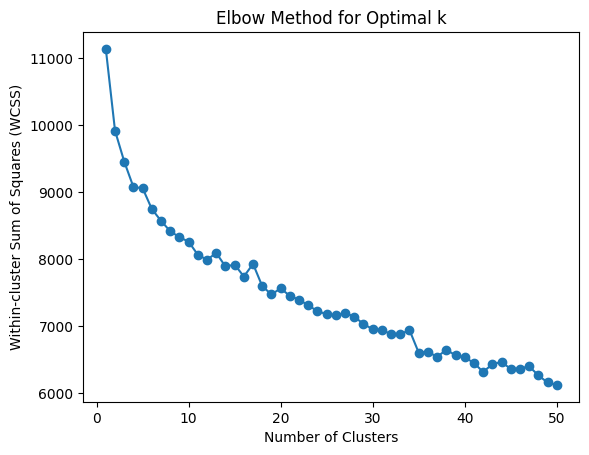

In [6]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        # print(self.centroids.shape)
        for idx in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels_euclidean(X)

            # Update centroids based on the mean of the data points assigned to each centroid
            # new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            new_centroids = np.array([X[labels == k].mean(axis=0) if np.sum(labels == k) > 0 else self.centroids[k] for k in range(self.n_clusters)])
             
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                print(f"{self.n_clusters} {idx+1} Converged")
                break

            self.centroids = new_centroids

    def _assign_labels_euclidean(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def inertia(self, X):
        labels = self._assign_labels_euclidean(X)
        inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                cluster_center = self.centroids[k]
                inertia += np.sum((cluster_points - cluster_center) ** 2)
        return inertia

X = torch.stack([tensor for tensor in pd.read_pickle('./Datasets/papers_of_interest/bert_cat_embeddings.pkl')['titleabs_embeddings'].values]).detach().cpu().numpy()
X = X.squeeze(1)
# Range of clusters to try
k_values = range(1, 51)

# Store inertias
inertias = []

# Fit KMeans for each cluster number and store inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia(X))

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = torch.stack([tensor for tensor in pd.read_pickle('./Datasets/papers_of_interest/bert_cat_embeddings.pkl')['titleabs_embeddings'].values]).detach().cpu().numpy().squeeze(1)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled.shape)

dbscan = DBSCAN()

# Fit DBSCAN to the data
labels = dbscan.fit_predict(X_scaled)

# Number of clusters found (-1 indicates noise points)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", num_clusters)

# Cluster labels for each data point
print("Cluster labels:", labels)


(313, 768)
Number of clusters: 0
Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -

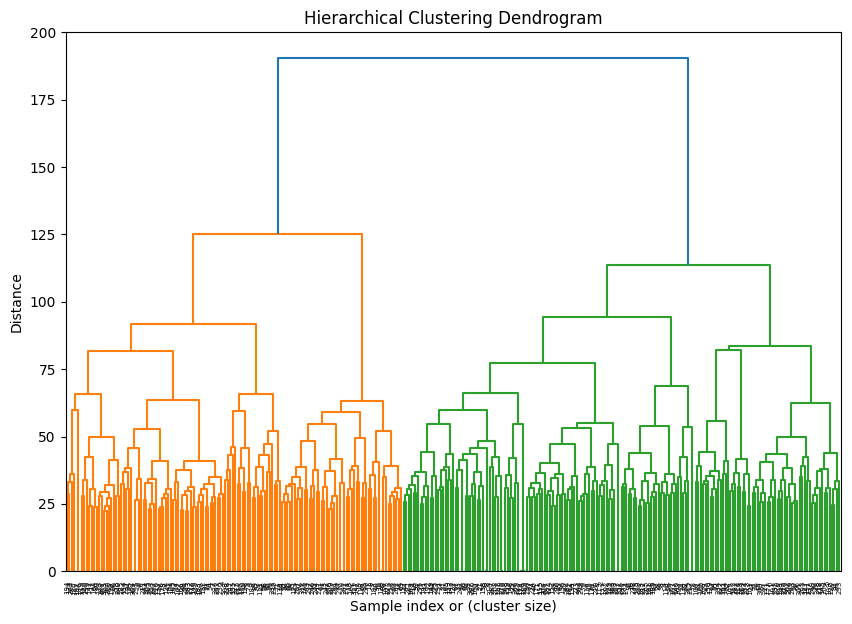

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

X = torch.stack([tensor for tensor in pd.read_pickle('./Datasets/papers_of_interest/bert_cat_embeddings.pkl')['titleabs_embeddings'].values]).detach().cpu().numpy().squeeze(1)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


In [9]:
from scipy.cluster.hierarchy import fcluster

# Decide the number of clusters based on the dendrogram
threshold = 50  # Example: threshold value from the dendrogram
agg_labels = fcluster(linked, threshold, criterion='distance')

# Cluster labels for each data point
print("Cluster labels:", agg_labels)


Cluster labels: [ 2  8 10 25 27  1 29 27 15 19 19 19 18 21 27 11  9 30 20 20 12 15  2  5
 15 14 29 16  9  2 15 17  1 15  5 22  9 16  8 15 19 28 24 17 17 12 12  2
 27 12  2 11 22 24 27  5 24  2  8 21 22 21  4 18 17 18  2  9 24 15 21 23
  7 22 27 25 28 12  6 11 15  5  7 20 22 22 30 15 22 24  1 27 22  1 29 24
 30 12 18 17  5  3 30  8 28  5  5 18 30  1  8 24  3  3  3 12 11 15 20 10
 30 22 16 30 28 22 18  2 25  5  7  2 27 28 32 27 25  2 23 12 27 17 30 16
  4  1  8 20 14 17 25  2 12 28 29 26 12 17 15 16 15  2 20  7 30 27 27 27
 17  3 11 12 12  9 12  9 13 10 28 13 27 12 29 19 10  9 32 12 24  9 28  9
 17 27 32 16 31 31  2 30  1 21 21  2 28  7  2 22 15 21 11 28  9  3 17 25
  2  6  1 30  1  2  5 12 12 14 28 26 26 10 27 22  2 24  5 23 27 29  9 20
 30 15 21  2 22  9 22 26  1  1  5 27 10 18  3 17 21 10 30 14 30  4 18  2
 32  9 14  8 14  3  2 20 27 18  9 17 15 21 11 15 12 17  3 27 12 29 15 15
  9 13 12 16 10  1 27 29 30 22 10  9  2  2  2 30 11 28 12 15 26 29 15 20
 22]


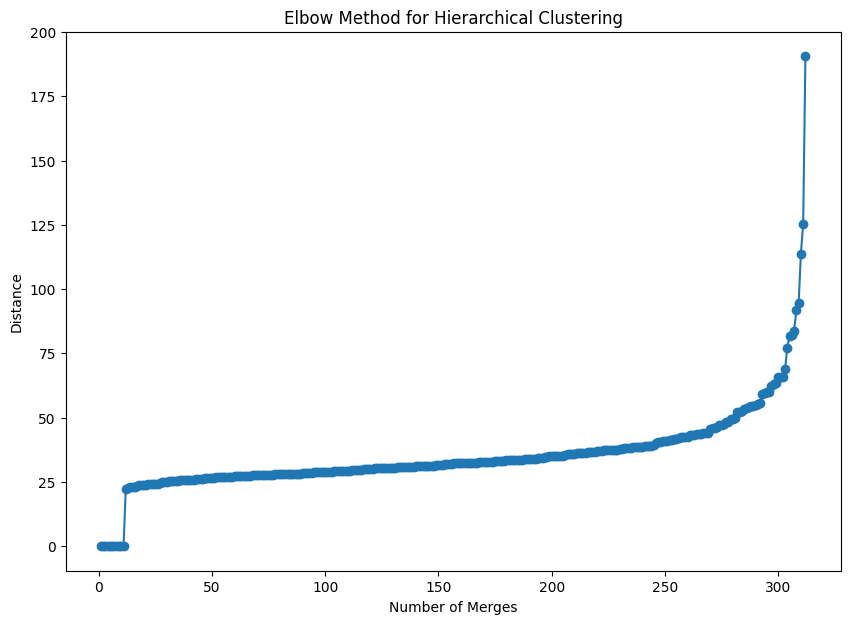

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your scaled data with shape (n_samples, n_features)

# Perform hierarchical clustering using Ward linkage
linked = linkage(X_scaled, method='ward')

# Calculate the distances between consecutive merges
distances = linked[:, 2]

# Plot the distances
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(distances) + 1), distances, marker='o')
plt.title('Elbow Method for Hierarchical Clustering')
plt.xlabel('Number of Merges')
plt.ylabel('Distance')
plt.show()


In [11]:
from sklearn.cluster import AgglomerativeClustering

# Assuming X is your scaled data with shape (n_samples, n_features)

# Initialize the AgglomerativeClustering object with the number of merges corresponding to the elbow
# Choose an appropriate distance_threshold based on the number of merges from the elbow method
distance_threshold = distances[270]  # Example: distance threshold value
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward')

# Fit the hierarchical clustering model to your data
agg_labels = agg_clustering.fit_predict(X_scaled)

# Number of clusters found (-1 indicates noise points)
num_clusters = len(set(agg_labels)) - (1 if -1 in agg_labels else 0)
print("Number of clusters:", num_clusters)

# Cluster labels for each data point
print("Cluster labels:", agg_labels)


Number of clusters: 43
Cluster labels: [ 5 26 25 41 14  3 42 14  0 13 13 13 31 12 14 28  4  7 19 19 20  0  5  1
  0 22 42 11  4  5  0  2  3  0  1 36  4 11 26  0 13  6 10  2  2 20 20  5
 14 20  5 28 23 10 14  1 10  5 26 12 23 12 21 31  2 31  5  4 10  0 12 30
  8 23 14 41  6 18 27 28  0  1  8 34 23 23  7  0 23 10  3 14 23  3 33 10
 16 20 31  2  1 32 16 26  6  1  1 31 16  3 26 10 32 32 32 20 28 17 34 25
  7 23 11 16  6 23 31 15 29  1  8  5 14  6 35 14 29 15 30 18 14  2  7 11
 21  3 26 19 22  2 29 15 20  6 33  9 20  2  0 11  0  5 19  8  7 14 14 14
  2 32 28 20 20  4 20  4 24 25  6 24 14 18 33 13 25  4 35 20 10  4  6  4
  2 14 35 11 37 37  5 16  3 12 12  5  6  8  5 23 17 12 28  6  4 32  2 29
  5 27  3  7  3  5  1 18 20 22  6 40  9 25 14 36  5 38  1 30 14 33  4 34
 16  0 12  5 36  4 36  9  3  3  1 14 39 31 32  2 12 39 16 22 16 21 31 15
 35  4 22 26 22 32  5 19 14 31  4  2 17 12 28 17 20  2 32 14 18 33  0 17
  4 24 20 11 25  3 14 42  7 36 25  4  5 15  5 16 28  6 20  0  9 42 17 19
 23]


#cosine

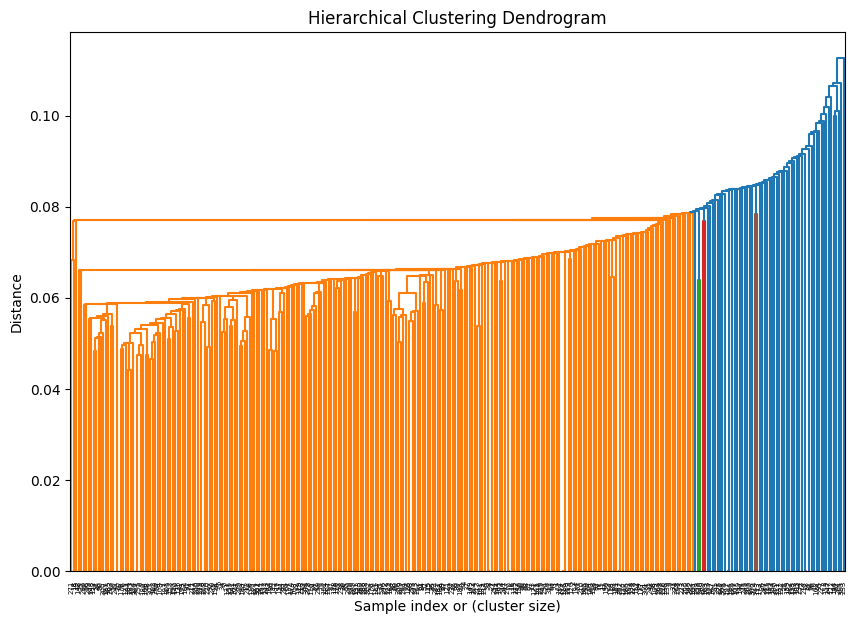

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


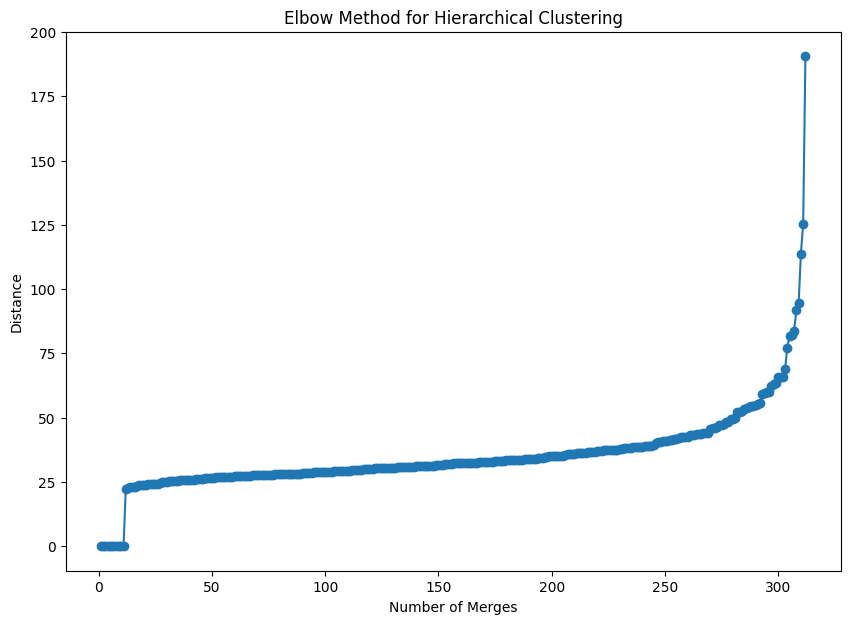

Number of clusters: 43
Cluster labels: [ 5 26 25 41 14  3 42 14  0 13 13 13 31 12 14 28  4  7 19 19 20  0  5  1
  0 22 42 11  4  5  0  2  3  0  1 36  4 11 26  0 13  6 10  2  2 20 20  5
 14 20  5 28 23 10 14  1 10  5 26 12 23 12 21 31  2 31  5  4 10  0 12 30
  8 23 14 41  6 18 27 28  0  1  8 34 23 23  7  0 23 10  3 14 23  3 33 10
 16 20 31  2  1 32 16 26  6  1  1 31 16  3 26 10 32 32 32 20 28 17 34 25
  7 23 11 16  6 23 31 15 29  1  8  5 14  6 35 14 29 15 30 18 14  2  7 11
 21  3 26 19 22  2 29 15 20  6 33  9 20  2  0 11  0  5 19  8  7 14 14 14
  2 32 28 20 20  4 20  4 24 25  6 24 14 18 33 13 25  4 35 20 10  4  6  4
  2 14 35 11 37 37  5 16  3 12 12  5  6  8  5 23 17 12 28  6  4 32  2 29
  5 27  3  7  3  5  1 18 20 22  6 40  9 25 14 36  5 38  1 30 14 33  4 34
 16  0 12  5 36  4 36  9  3  3  1 14 39 31 32  2 12 39 16 22 16 21 31 15
 35  4 22 26 22 32  5 19 14 31  4  2 17 12 28 17 20  2 32 14 18 33  0 17
  4 24 20 11 25  3 14 42  7 36 25  4  5 15  5 16 28  6 20  0  9 42 17 19
 23]


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

X = torch.stack([tensor for tensor in pd.read_pickle('./Datasets/papers_of_interest/bert_cat_embeddings.pkl')['titleabs_embeddings'].values]).detach().cpu().numpy().squeeze(1)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

cosine_dist = pdist(X, metric='cosine')
linked = linkage(cosine_dist, method='single')
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

# Decide the number of clusters based on the dendrogram
threshold = 0.5  # Example: threshold value from the dendrogram
agg_labels = fcluster(linked, threshold, criterion='distance')

# Cluster labels for each data point
print("Cluster labels:", agg_labels)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your scaled data with shape (n_samples, n_features)

# Perform hierarchical clustering using Ward linkage
linked = linkage(X_scaled, method='ward')

# Calculate the distances between consecutive merges
distances = linked[:, 2]

# Plot the distances
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(distances) + 1), distances, marker='o')
plt.title('Elbow Method for Hierarchical Clustering')
plt.xlabel('Number of Merges')
plt.ylabel('Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

# Assuming X is your scaled data with shape (n_samples, n_features)

# Initialize the AgglomerativeClustering object with the number of merges corresponding to the elbow
# Choose an appropriate distance_threshold based on the number of merges from the elbow method
distance_threshold = distances[270]  # Example: distance threshold value
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward')

# Fit the hierarchical clustering model to your data
agg_labels = agg_clustering.fit_predict(X_scaled)

# Number of clusters found (-1 indicates noise points)
num_clusters = len(set(agg_labels)) - (1 if -1 in agg_labels else 0)
print("Number of clusters:", num_clusters)

# Cluster labels for each data point
print("Cluster labels:", agg_labels)
